# **Bài toán nâng cao 1 (NC1)**

In [ ]:
!pip install matplotlib matplotlib-venn

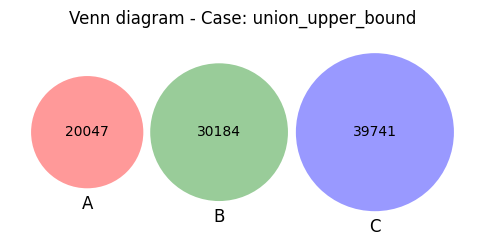

==== UNION_UPPER_BOUND ====
P(A ∪ B ∪ C) = 0.8997 ∈ [0.4000, 0.9000]
P(A ∩ B ∩ C) = 0.0000 ∈ [0.0000, 0.2000]



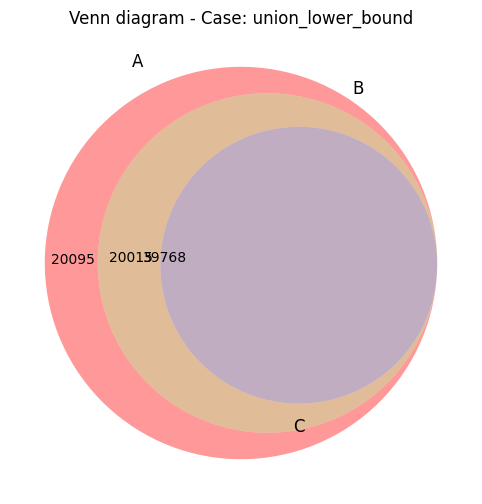

==== UNION_LOWER_BOUND ====
P(A ∪ B ∪ C) = 0.7988 ∈ [0.8000, 1.0000]
P(A ∩ B ∩ C) = 0.3977 ∈ [0.0000, 0.4000]



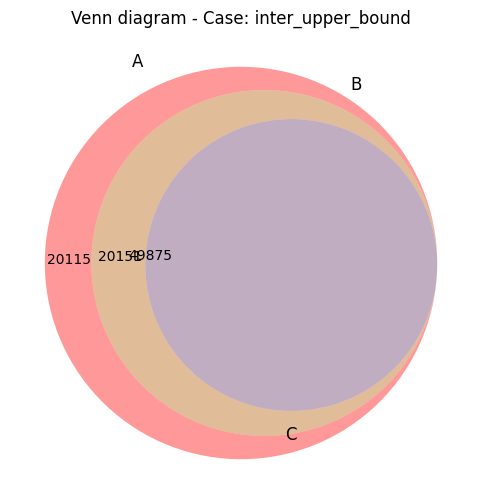

==== INTER_UPPER_BOUND ====
P(A ∪ B ∪ C) = 0.9014 ∈ [0.9000, 1.0000]
P(A ∩ B ∩ C) = 0.4988 ∈ [0.1000, 0.5000]



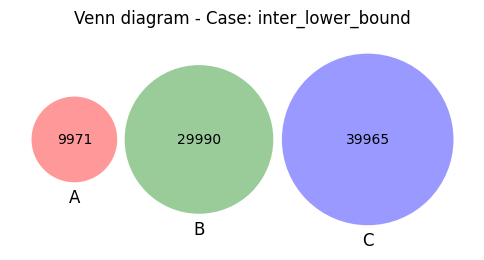

==== INTER_LOWER_BOUND ====
P(A ∪ B ∪ C) = 0.7993 ∈ [0.4000, 0.8000]
P(A ∩ B ∩ C) = 0.0000 ∈ [0.0000, 0.1000]



In [ ]:
import random
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def simulate_and_plot(P_A, P_B, P_C, case_type, N=100000):
    A, B, C = [], [], []

    for _ in range(N):
        r = random.random()

        if case_type == "union_upper_bound":  # TH1: rời nhau
            A.append(r < P_A)
            B.append(P_A <= r < P_A + P_B)
            C.append(P_A + P_B <= r < P_A + P_B + P_C)

        elif case_type == "union_lower_bound":  # TH2: A ⊇ B ⊇ C
            a = r < P_A
            b = r < P_B if a else False
            c = r < P_C if b else False
            A.append(a)
            B.append(b)
            C.append(c)

        elif case_type == "inter_upper_bound":  # TH3: C ⊆ B ⊆ A
            c = r < P_C
            b = True if c else (r < P_B)
            a = True if b else (r < P_A)
            A.append(a)
            B.append(b)
            C.append(c)

        elif case_type == "inter_lower_bound":  # TH4: rời nhau
            A.append(r < P_A)
            B.append(P_A <= r < P_A + P_B)
            C.append(P_A + P_B <= r < P_A + P_B + P_C)

    # Đếm từng vùng trong biểu đồ Venn
    only_A = sum(a and not b and not c for a, b, c in zip(A, B, C))
    only_B = sum(b and not a and not c for a, b, c in zip(A, B, C))
    only_C = sum(c and not a and not b for a, b, c in zip(A, B, C))
    A_B = sum(a and b and not c for a, b, c in zip(A, B, C))
    A_C = sum(a and c and not b for a, b, c in zip(A, B, C))
    B_C = sum(b and c and not a for a, b, c in zip(A, B, C))
    ABC = sum(a and b and c for a, b, c in zip(A, B, C))

    # Biểu đồ Venn
    plt.figure(figsize=(6,6))
    venn3(subsets = (only_A, only_B, A_B, only_C, A_C, B_C, ABC),
          set_labels = ('A', 'B', 'C'))
    plt.title(f"Venn diagram - Case: {case_type}")
    plt.show()

    # Tính xác suất thực nghiệm
    P_union = sum(a or b or c for a, b, c in zip(A, B, C)) / N
    P_inter = sum(a and b and c for a, b, c in zip(A, B, C)) / N

    # Cận lý thuyết
    upper_union = min(1, P_A + P_B + P_C)
    lower_union = max(P_A, P_B, P_C, P_A + P_B + P_C - 2)
    upper_inter = min(P_A, P_B, P_C)
    lower_inter = max(0, P_A + P_B + P_C - 2)

    # In kết quả
    print(f"==== {case_type.upper()} ====")
    print(f"P(A ∪ B ∪ C) = {P_union:.4f} ∈ [{lower_union:.4f}, {upper_union:.4f}]")
    print(f"P(A ∩ B ∩ C) = {P_inter:.4f} ∈ [{lower_inter:.4f}, {upper_inter:.4f}]\n")

# TH1: dấu bằng tại cận trên của hợp
simulate_and_plot(0.2, 0.3, 0.4, "union_upper_bound")

# TH2: dấu bằng tại cận dưới của hợp
simulate_and_plot(0.8, 0.6, 0.4, "union_lower_bound")

# TH3: dấu bằng tại cận trên của giao
simulate_and_plot(0.9, 0.7, 0.5, "inter_upper_bound")

# TH4: dấu bằng tại cận dưới của giao
simulate_and_plot(0.1, 0.3, 0.4, "inter_lower_bound")
